# MPMS data visualization

This notebook visualizes data from low-temperature experiments conducted on an MPMS instrument and exported to MagIC format.

In the following example, specimens from samples of diabase dikes from the East Central Minnesota batholith have undergone the following experiments:
- **RTSIRM**: in this experiment, a pulsed field was applied at room temperature (300 K) with the specimen then being cycled down to 10 K (-263.15ºC) and back to room temperature.
- **FC LTSIRM**: in this experiment, the specimens were cooled down to 10 K in the presence of a strong field and then warmed back up to room temperature.
- **ZFC LTSIRM**: in this experiment, the specimens were cooled down in a zero-field environment, pulsed with a strong field at 10 K and then warmed back up to room temperature.

## Import scientific python libraries

Run the cell below to import the functions needed for the notebook.

In [1]:
import rockmag as rmag
import pmagpy.contribution_builder as cb

import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Import measurements

After having run the [rockmag_data_unpack.ipynb](./rockmag_data_unpack.ipynb) notebook, the folder `./example_data/ECMB`, has a measurements table. We can import that table for analysis into a DataFrame that we will call `measurements`.

In [2]:
# set the dir_path to the directory where the measurements.txt file is located
dir_path = './example_data/ECMB'

# create a contribution object from the tables in the directory
contribution = cb.Contribution(dir_path)
measurements = contribution.tables['measurements'].df

-I- Using online data model
-I- Getting method codes from earthref.org
-I- Importing controlled vocabularies from https://earthref.org


## Plot data

 We can now plot the MPMS data within the measurements file using the `rmag.make_mpms_plots()` function.

In [3]:
rmag.make_mpms_plots(measurements)

Dropdown(description='Specimen:', options=('NED18-2c', 'NED2-8c', 'NED4-1c'), value='NED18-2c')

RadioButtons(description='Plot with:', options=(('matplotlib', False), ('plotly', True)), value=False)

Output()

### Extract MPMS data for a single specimen

We can now extract the MPMS data for a specific specimen.

First, we need to define the specimen for which we are extracting the data. To do this, we set `specimen_name` to be equal to a string (i.e. the specimen name within quotation marks).

Then, we can apply the `rmag.extract_mpms_data` function to extract the data for that specimen.

In [4]:
specimen_name = 'NED4-1c'
fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data = rmag.extract_mpms_data(measurements, specimen_name)

### Plot the data for a single specimen

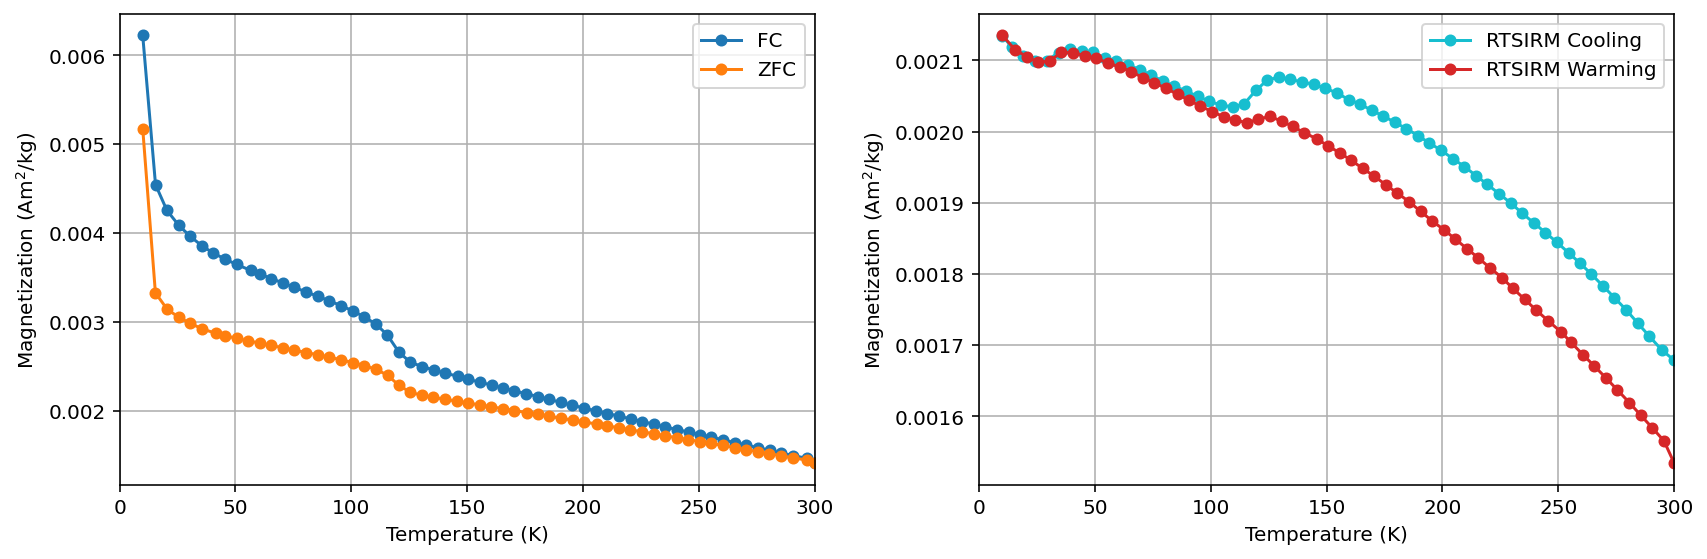

In [5]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data)

### Plot the derivative

By setting `plot_derivative=True`, the derivative of the experimental data will be calculated and plotted. 

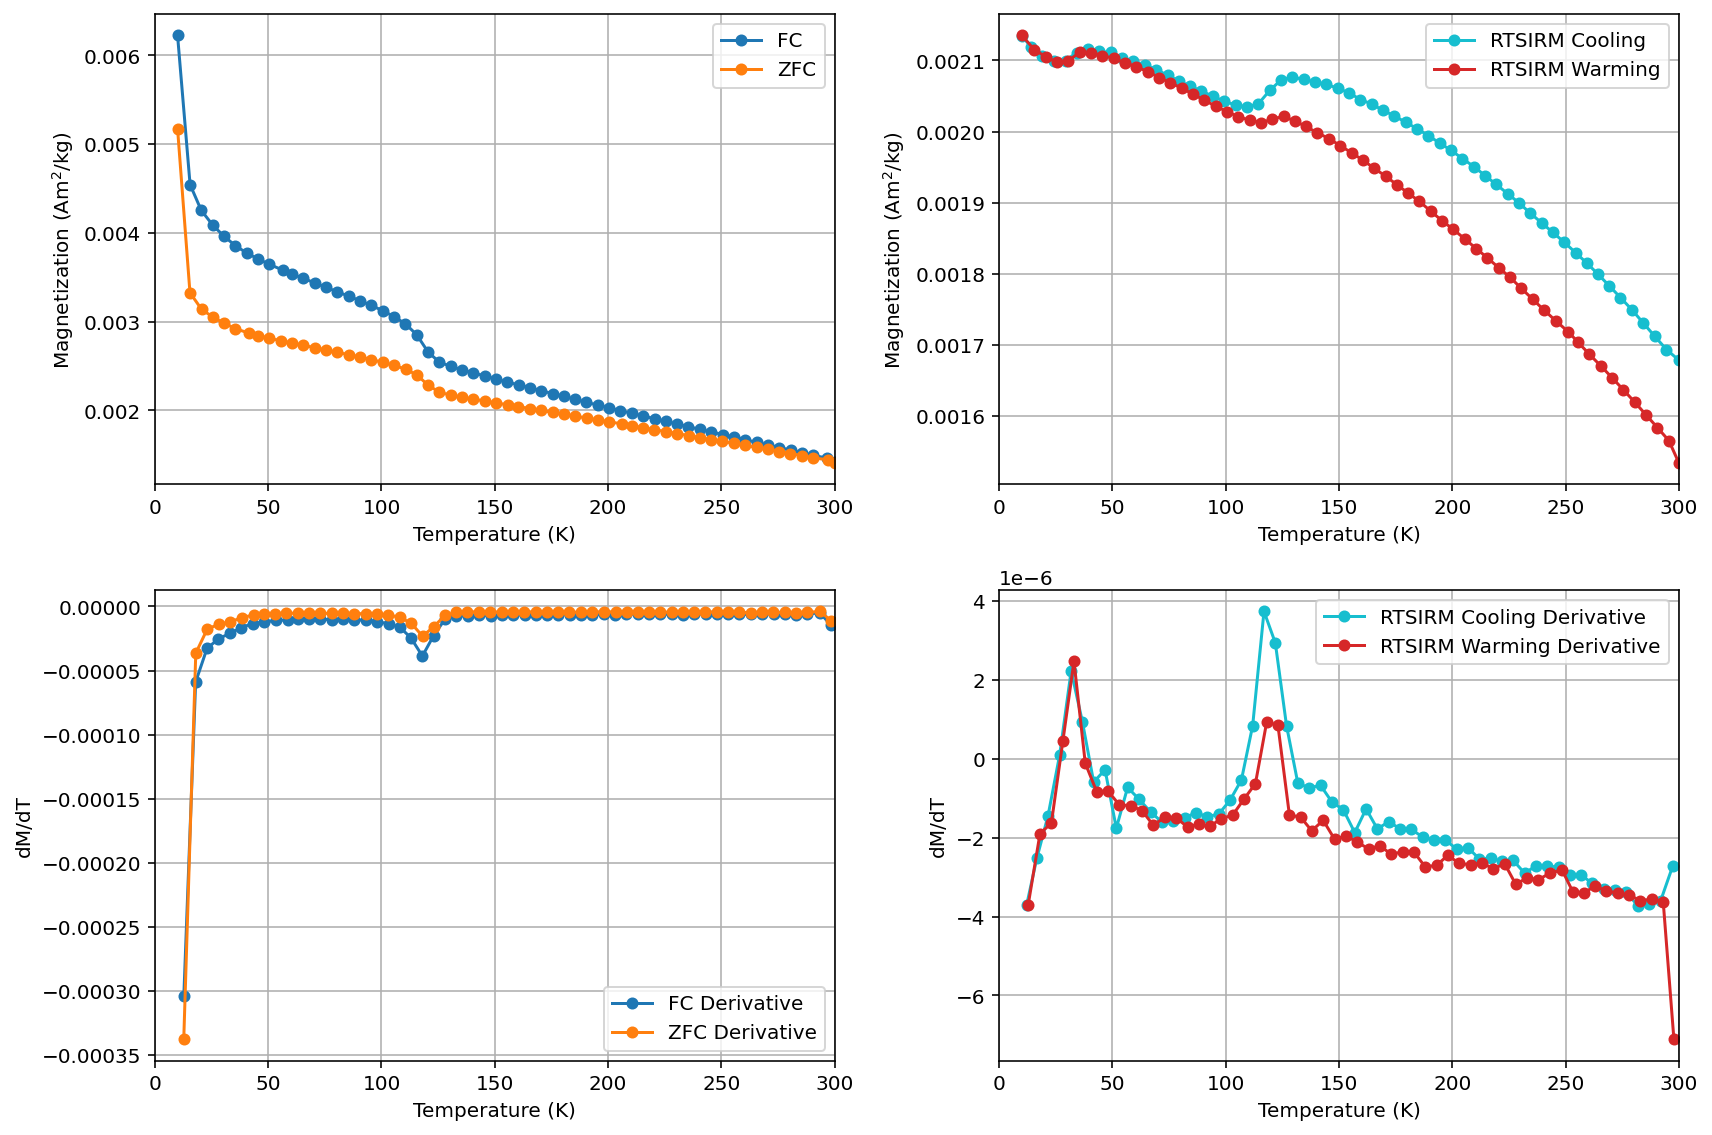

In [6]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, plot_derivative=True)

### Make interactive plots

Rather than the static plots made above (which are made using matplotlib), you may want to make interactive plots. This can be done by putting in the parameter `use_plotly=True` which generates plots using Plotly.

In [7]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, use_plotly=True)

In [8]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, use_plotly=True, plot_derivative=True)

The colors and symbols of the plots can be customized by providing other values than the default parameters as in the example below:

In [9]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, 
                   fc_color='orange', zfc_color='purple', rtsirm_cool_color='blue', rtsirm_warm_color='darkred',
                   fc_marker='^', zfc_marker='o', rtsirm_cool_marker='*', rtsirm_warm_marker='s',
                   symbol_size=5, use_plotly=True)

This customization can also be applied to Matplotlib plots:

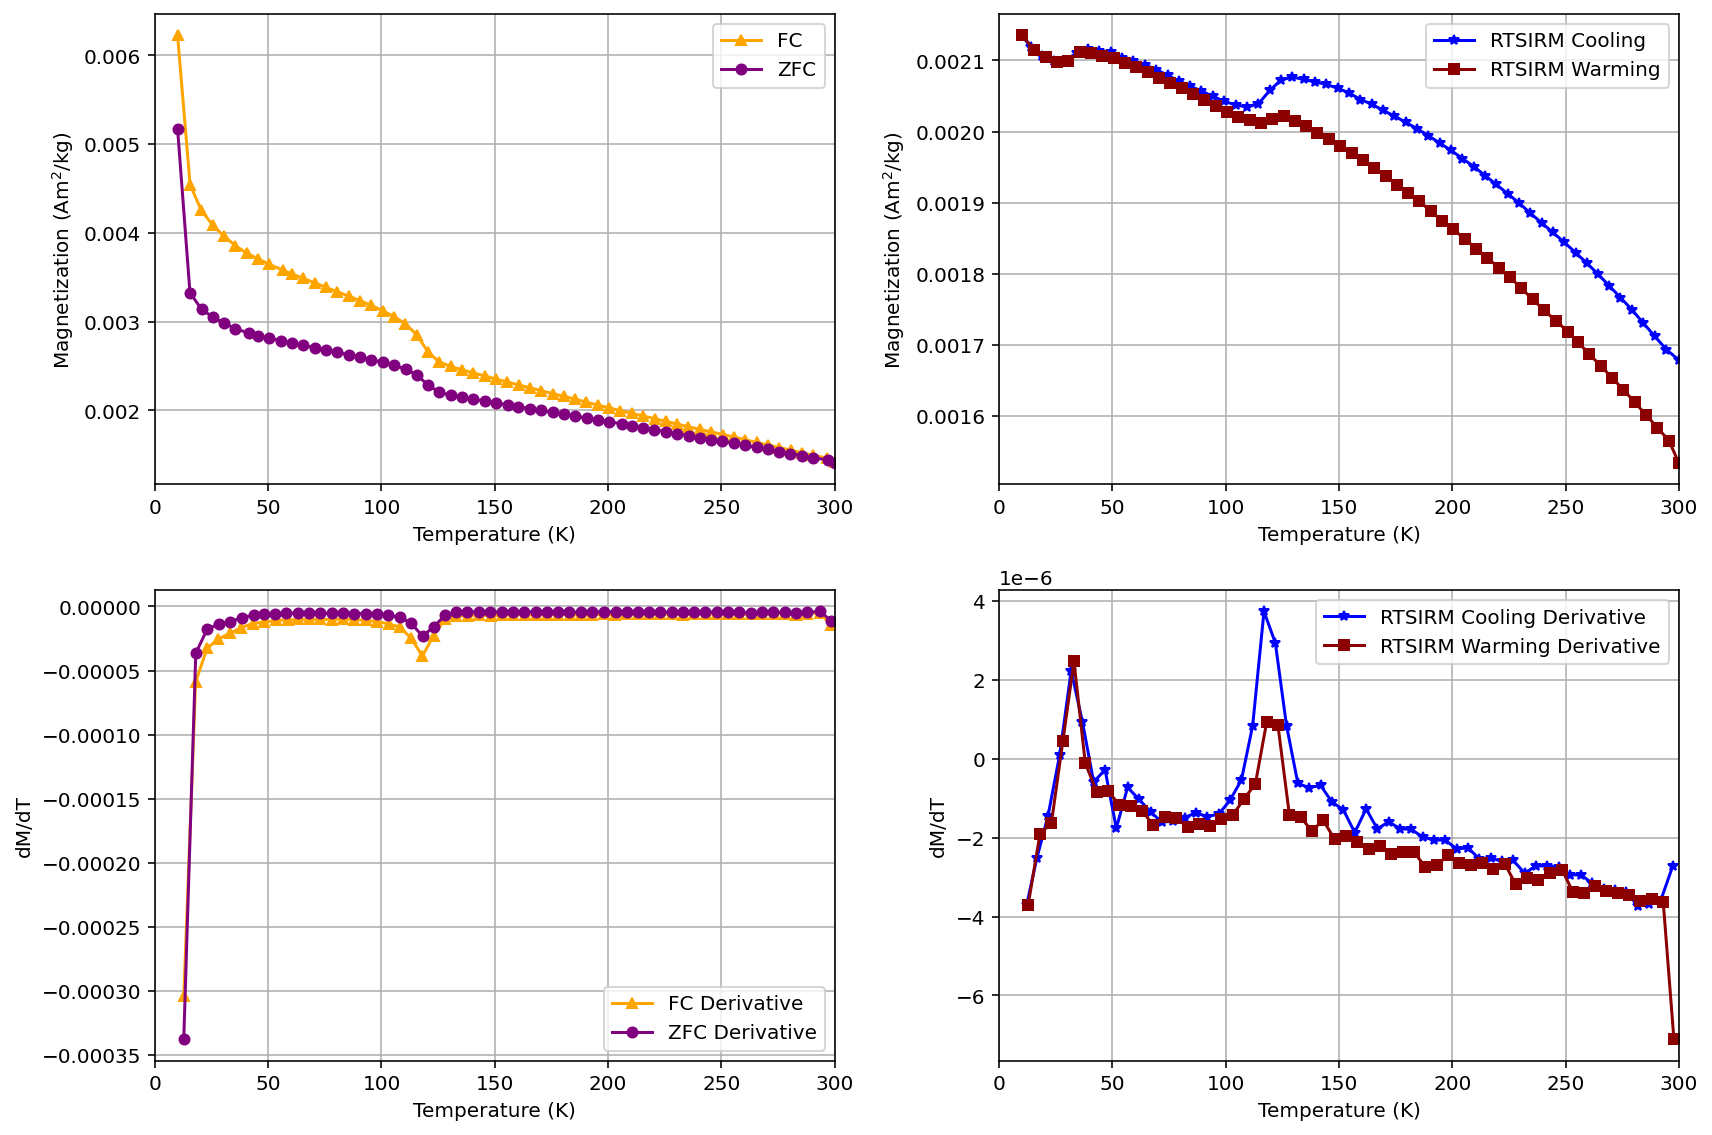

In [10]:
rmag.plot_mpms_data(fc_data, zfc_data, rtsirm_cool_data, rtsirm_warm_data, 
                   fc_color='orange', zfc_color='purple', rtsirm_cool_color='blue', rtsirm_warm_color='darkred',
                   fc_marker='^', zfc_marker='o', rtsirm_cool_marker='*', rtsirm_warm_marker='s',
                   symbol_size=5, use_plotly=False, plot_derivative=True)